# Balance of Power

http://www.binarytribune.com/forex-trading-indicators/balance-of-power

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^NSEBANK'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500


In [3]:
df['BOP'] = (df['Adj Close'] - df['Open']) / (df['High'] - df['Low'])

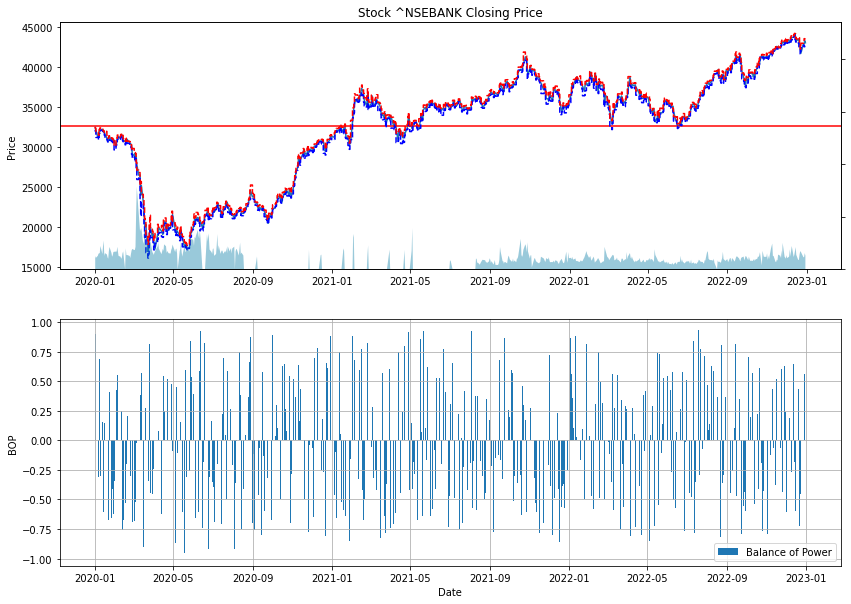

In [4]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.step(df.index, df['Low'], c='blue', linestyle='--')
ax1.step(df.index, df['High'], c='red', linestyle='--')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['BOP'], label='Balance of Power')
ax2.grid()
ax2.set_ylabel('BOP')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with BOP

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['BOP'] = (dfc['Adj Close'] - dfc['Open']) / (dfc['High'] - dfc['Low'])
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,BOP,VolumePositive
0,18262.770833,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,0.901972,True
1,18263.770833,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,-0.698625,False
2,18266.770833,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,-0.905583,False
3,18267.770833,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,-0.305920,False
4,18268.770833,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,0.684023,True


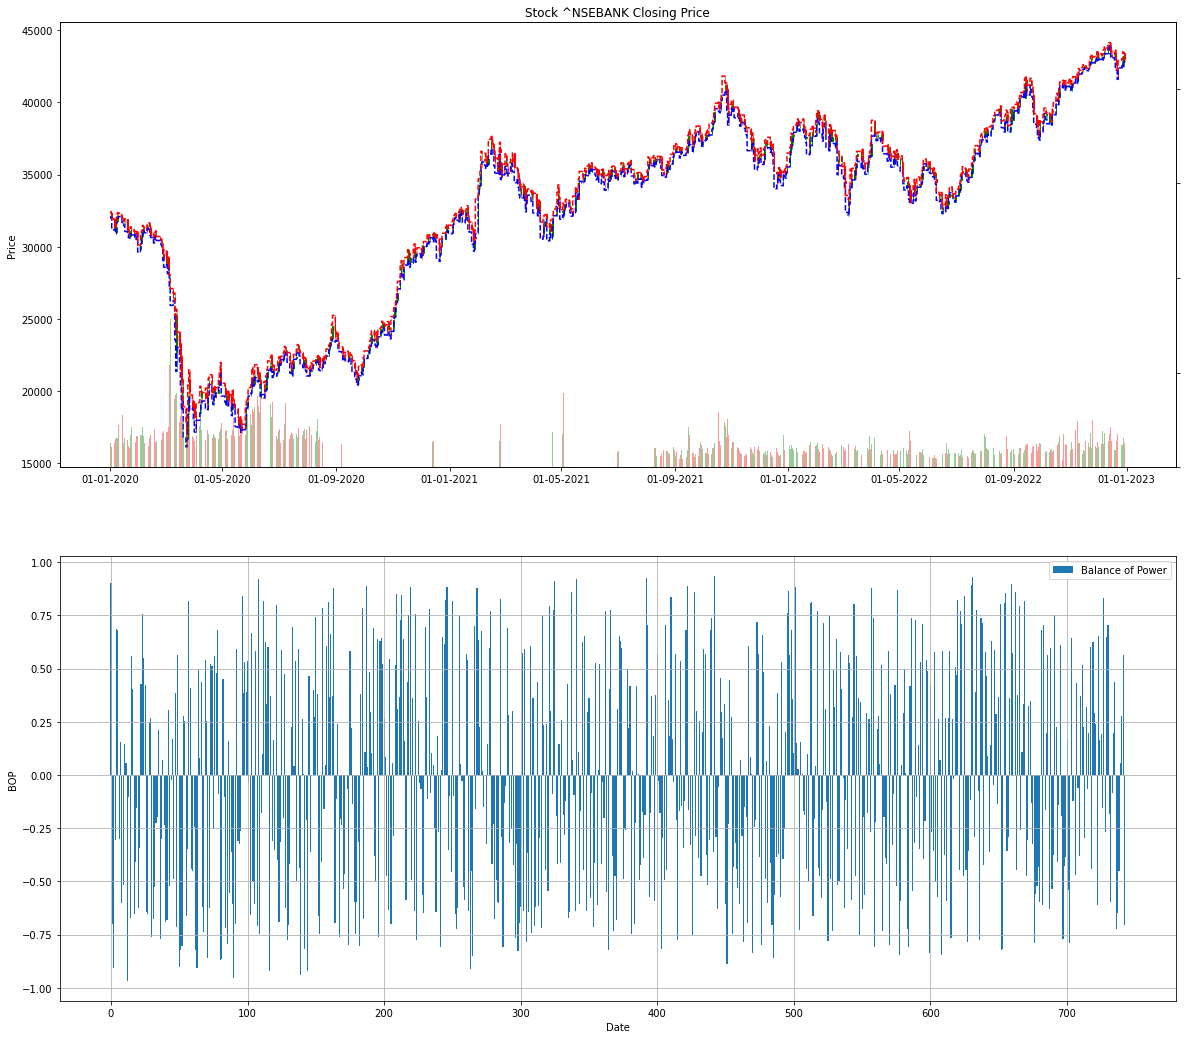

In [8]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(20,18))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1.step(dfc.Date, dfc['Low'], c='blue', linestyle='--')
ax1.step(dfc.Date, dfc['High'], c='red', linestyle='--')
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(dfc.index, dfc['BOP'], label='Balance of Power')
ax2.grid()
ax2.set_ylabel('BOP')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

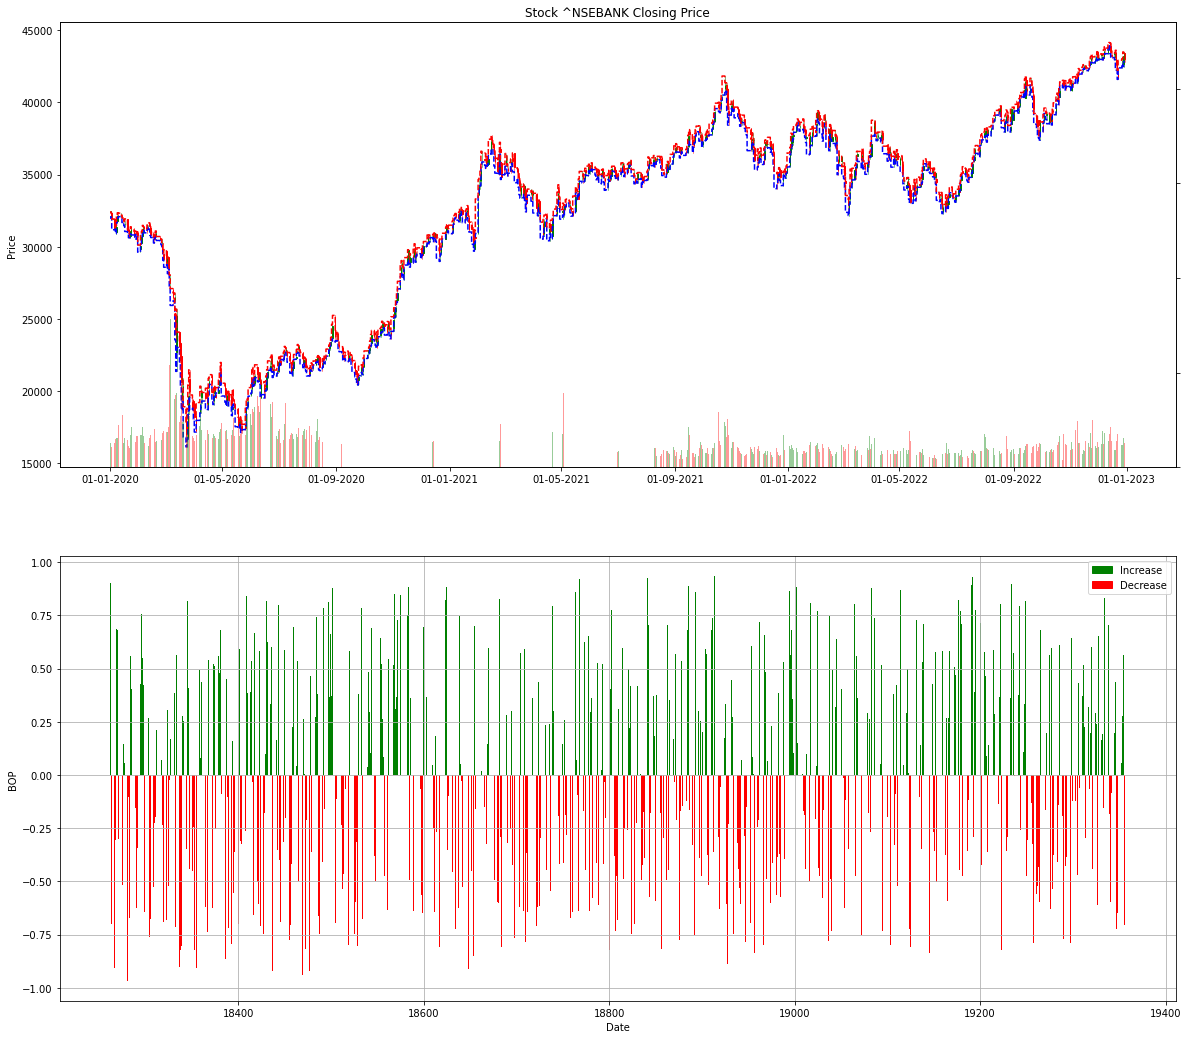

In [9]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(20,18))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1.step(dfc.Date, dfc['Low'], c='blue', linestyle='--')
ax1.step(dfc.Date, dfc['High'], c='red', linestyle='--')
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
status = []
for i in dfc['BOP']:
    if i >= 0:
        status.append(True) # Increase
    else:    
        status.append(False) # Decrease
dfc['Status'] = status
#dfc['Positive'] = dfc['BOP'] > 0
colors2 = dfc.Status.map({True: 'g', False: 'r'})
Increase = mpatches.Patch(color='g', label='Increase')
Decrease = mpatches.Patch(color='r', label='Decrease')
ax2.bar(dfc.Date, dfc['BOP'], color = colors2)
ax2.grid()
ax2.set_ylabel('BOP')
ax2.set_xlabel('Date')
ax2.legend(handles=[Increase,Decrease])